In [ ]:
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

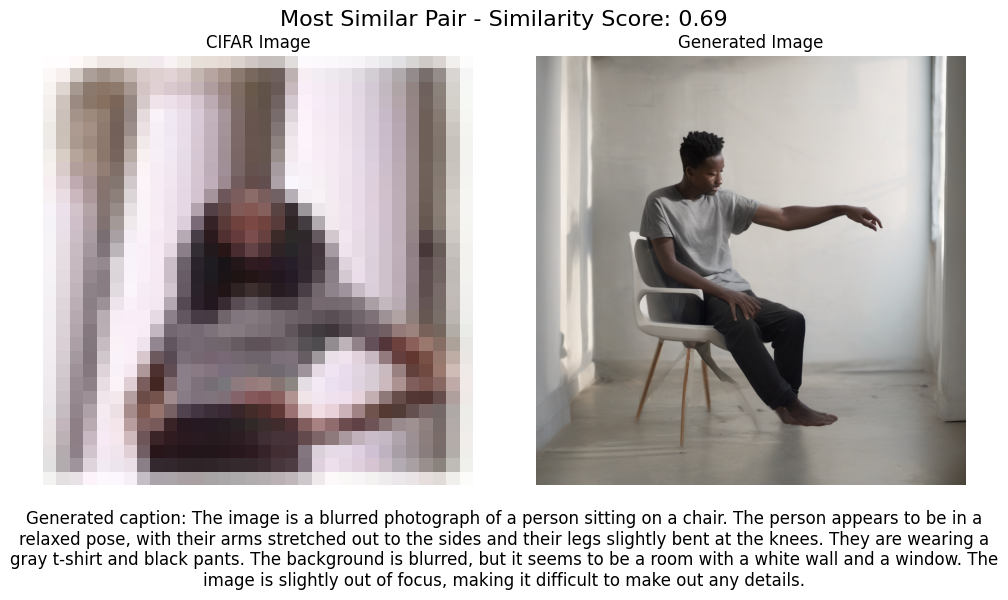

In [13]:
def plot_most_similar_pair(image_similarities_path, cifar_images_dir, cifar_pickle_path, captions_path):
    # Load the similarities DataFrame
    similarity_df = pd.read_csv(image_similarities_path, index_col=0)
    cifar_captions = pd.read_pickle(captions_path)

    # Find the most similar image pair
    most_similar_idx = similarity_df['similarity'].idxmax()
    most_similar_score = similarity_df.loc[most_similar_idx, 'similarity']

    # Load the CIFAR dataset
    cifar_df = pd.read_pickle(cifar_pickle_path)
    source_image = cifar_df.iloc[most_similar_idx].image  # Adjust index for 0-based DataFrame

    # Load the file image
    cifar_images_dir = Path(cifar_images_dir)
    file_image_path = cifar_images_dir / f"{most_similar_idx}.png"
    
    if not file_image_path.exists():
        raise FileNotFoundError(f"File image not found: {file_image_path}")

    generated_image = Image.open(file_image_path)
    
    # Caption for the generated image
    generated_caption = cifar_captions[most_similar_idx]
    
    # Plot the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Most Similar Pair - Similarity Score: {most_similar_score:.2f}", fontsize=16)

    # Display CIFAR image
    axes[0].imshow(Image.fromarray(source_image.astype('uint8')))
    axes[0].axis('off')
    axes[0].set_title("CIFAR Image")

    # Display file image
    axes[1].imshow(generated_image)
    axes[1].axis('off')
    axes[1].set_title("Generated Image")

    # Add the caption at the bottom
    fig.text(0.5, -0.1, f"Generated caption: {generated_caption}", ha='center', va='center', fontsize=12, wrap=True)

    plt.tight_layout()
    plt.show()

# Example usage
plot_most_similar_pair(
    image_similarities_path='image_similarities.csv',
    cifar_images_dir='images/images_cifar',
    cifar_pickle_path='cifar100_man_woman_baby_girl_boy.pkl',
    captions_path='captions/captions_cifar100_man_woman_baby_girl_boy.pkl',
)


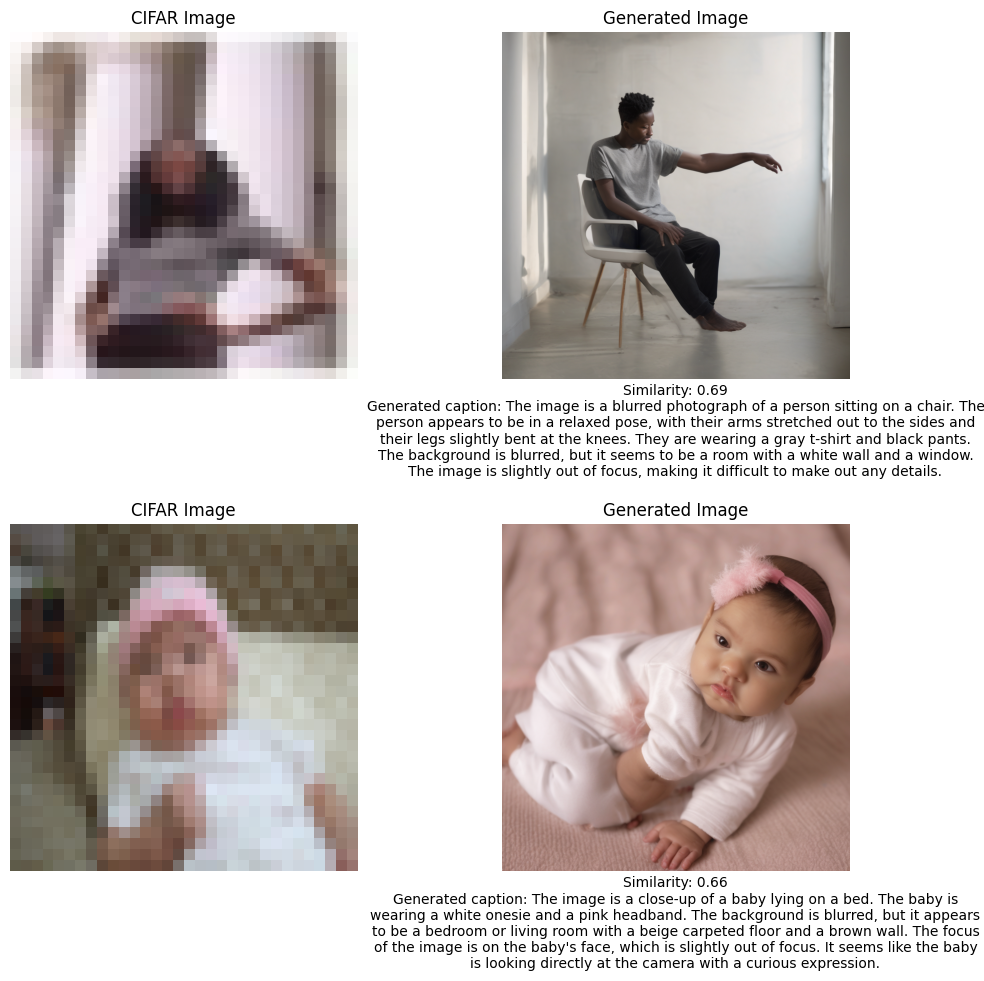

In [16]:
def plot_top_k_similar_pairs(image_similarities_path, cifar_images_dir, cifar_pickle_path, captions_path, k=5):
    # Load the similarities DataFrame
    similarity_df = pd.read_csv(image_similarities_path, index_col=0)
    cifar_captions = pd.read_pickle(captions_path)

    # Find the top k most similar image pairs
    top_k_similar = similarity_df.nlargest(k, 'similarity')

    # Load the CIFAR dataset
    cifar_df = pd.read_pickle(cifar_pickle_path)

    # Create a figure with k rows and 2 columns
    fig, axes = plt.subplots(k, 2, figsize=(10, 5*k))

    for i, (idx, row) in enumerate(top_k_similar.iterrows()):
        similarity_score = row['similarity']
        source_image = cifar_df.iloc[idx].image  # Adjust index for 0-based DataFrame

        # Load the file image
        cifar_images_dir = Path(cifar_images_dir)
        file_image_path = cifar_images_dir / f"{idx}.png"
        
        if not file_image_path.exists():
            raise FileNotFoundError(f"File image not found: {file_image_path}")

        generated_image = Image.open(file_image_path)
        
        # Caption for the generated image
        generated_caption = cifar_captions[idx]
        
        # Display CIFAR image
        axes[i, 0].imshow(Image.fromarray(source_image.astype('uint8')))
        axes[i, 0].axis('off')
        axes[i, 0].set_title("CIFAR Image")

        # Display file image
        axes[i, 1].imshow(generated_image)
        axes[i, 1].axis('off')
        axes[i, 1].set_title("Generated Image")

        # Add the similarity score and caption
        axes[i, 1].text(0.5, -0.15, f"Similarity: {similarity_score:.2f}\nGenerated caption: {generated_caption}", 
                        ha='center', va='center', transform=axes[i, 1].transAxes, fontsize=10, wrap=True)

    plt.tight_layout()
    plt.show()
    fig.savefig('results_most.png')

# Example usage
plot_top_k_similar_pairs(
    image_similarities_path='image_similarities.csv',
    cifar_images_dir='images/images_cifar',
    cifar_pickle_path='cifar100_man_woman_baby_girl_boy.pkl',
    captions_path='captions/captions_cifar100_man_woman_baby_girl_boy.pkl',
    k=2  # Change this value to plot a different number of top similar pairs
)

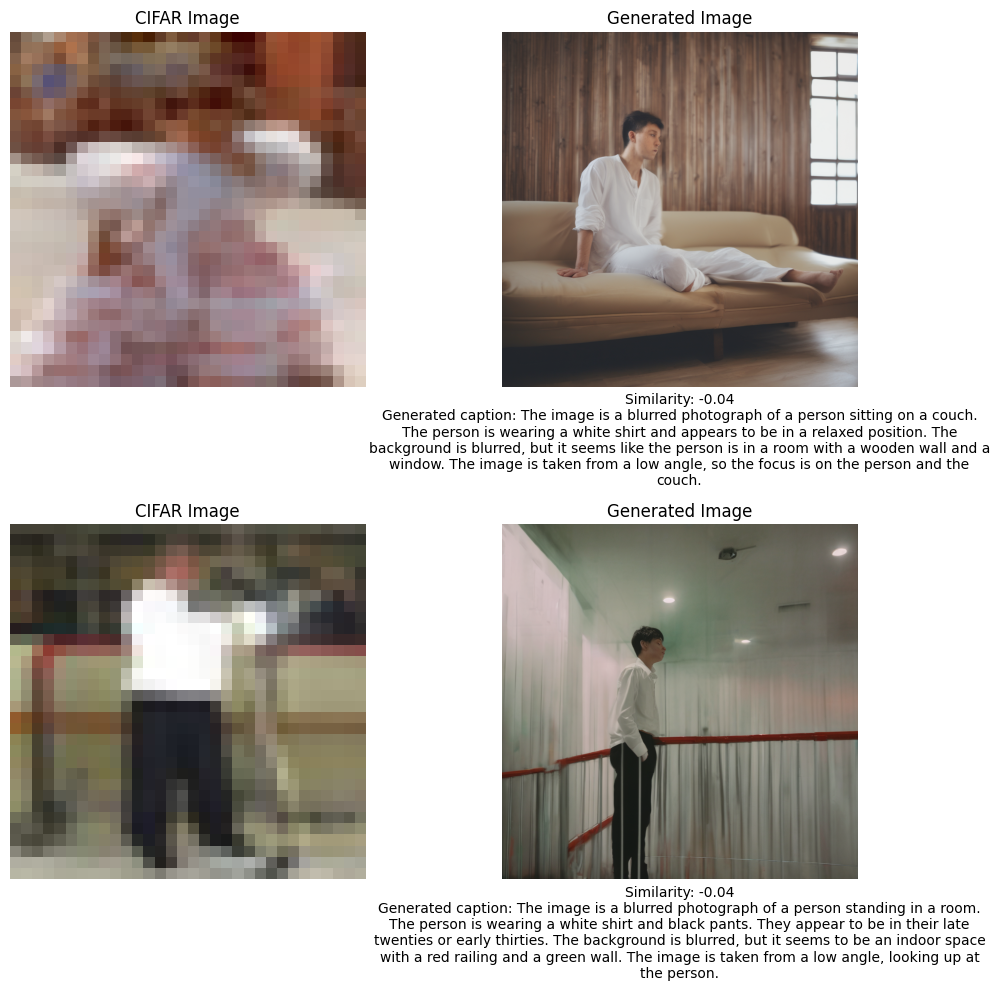

In [17]:
def plot_top_k_least_similar_pairs(image_similarities_path, cifar_images_dir, cifar_pickle_path, captions_path, k=5):
    # Load the similarities DataFrame
    similarity_df = pd.read_csv(image_similarities_path, index_col=0)
    cifar_captions = pd.read_pickle(captions_path)

    # Find the top k most similar image pairs
    top_k_similar = similarity_df.nsmallest(k, 'similarity')

    # Load the CIFAR dataset
    cifar_df = pd.read_pickle(cifar_pickle_path)

    # Create a figure with k rows and 2 columns
    fig, axes = plt.subplots(k, 2, figsize=(10, 5*k))

    for i, (idx, row) in enumerate(top_k_similar.iterrows()):
        similarity_score = row['similarity']
        source_image = cifar_df.iloc[idx].image  # Adjust index for 0-based DataFrame

        # Load the file image
        cifar_images_dir = Path(cifar_images_dir)
        file_image_path = cifar_images_dir / f"{idx}.png"
        
        if not file_image_path.exists():
            raise FileNotFoundError(f"File image not found: {file_image_path}")

        generated_image = Image.open(file_image_path)
        
        # Caption for the generated image
        generated_caption = cifar_captions[idx]
        
        # Display CIFAR image
        axes[i, 0].imshow(Image.fromarray(source_image.astype('uint8')))
        axes[i, 0].axis('off')
        axes[i, 0].set_title("CIFAR Image")

        # Display file image
        axes[i, 1].imshow(generated_image)
        axes[i, 1].axis('off')
        axes[i, 1].set_title("Generated Image")

        # Add the similarity score and caption
        axes[i, 1].text(0.5, -0.15, f"Similarity: {similarity_score:.2f}\nGenerated caption: {generated_caption}", 
                        ha='center', va='center', transform=axes[i, 1].transAxes, fontsize=10, wrap=True)

    plt.tight_layout()
    plt.show()
    fig.savefig('results_least.png')

# Example usage
plot_top_k_least_similar_pairs(
    image_similarities_path='image_similarities.csv',
    cifar_images_dir='images/images_cifar',
    cifar_pickle_path='cifar100_man_woman_baby_girl_boy.pkl',
    captions_path='captions/captions_cifar100_man_woman_baby_girl_boy.pkl',
    k=2  # Change this value to plot a different number of top similar pairs
)